<a href="https://colab.research.google.com/github/ssnyu/quant-strategies/blob/main/Bitcoin_Univariate_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GARCH model for Bitcoin volitality prediction

GARCH(1,1) Model Implementation and Evaluation
The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model is a widely used tool in financial econometrics for modeling the volatility of asset returns.

The GARCH(1,1) model is characterized by two main parameters: alpha (α) and beta (β). These parameters determine the persistence of shocks to the variance of the asset returns. Specifically, alpha governs the impact of past squared returns on the current conditional variance, while beta controls the impact of the lagged conditional variance itself.

 The implementation includes functions to calculate the conditional variance of returns based on the model's parameters.

 Garch(1,1) model is given by:
 h_t^2 = α_0 + α_1 * r_{t-1}^2 + β_1 * h_{t-1}^2


In [40]:
!pip install yfinance arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.6 MB/s eta 0:00:00


In [41]:
import yfinance as yf
import pandas as pd
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def get_bitcoin_historical_data(start_date, end_date):
    bitcoin_data = yf.download('BTC-USD', start=start_date, end=end_date)
    return bitcoin_data
start_date = '2010-01-01'
end_date = '2024-01-01'

bitcoin_historical_data = get_bitcoin_historical_data(start_date, end_date)
btc = bitcoin_historical_data["Close"]

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Plot of returns')

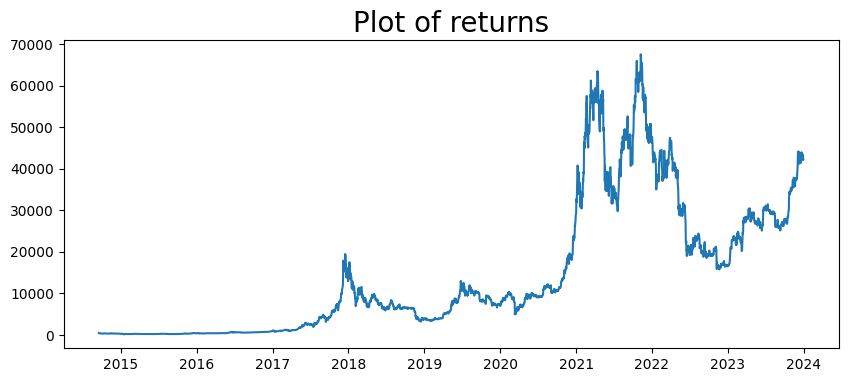

In [42]:
plt.figure(figsize=(10,4))
plt.plot(btc)
plt.title('Plot of returns', fontsize=20)

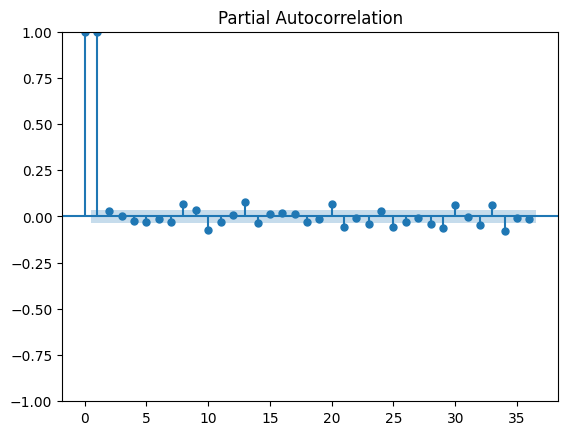

In [43]:
plot_pacf(np.array(btc)**2)
plt.show()

In [44]:
import numpy as np
from scipy.optimize import minimize

# Define the GARCH(1,1) variance equation function
def garch(r, params):
    alpha_0, alpha_1, beta_1 = params
    squared_return = np.square(r)
    results = [alpha_0 + alpha_1 * squared_return[0] + beta_1 * np.var(r)]
    for t in range(1, len(squared_return)):
        next_h2 = alpha_0 + alpha_1 * squared_return[t-1] + beta_1 * results[-1]
        results.append(next_h2)
    return np.array(results)

def mean_sq_err(params):
    target_var = np.square(return_test)
    estimated_var = garch(return_test, params)
    return np.sum(np.square(target_var - estimated_var))

In [45]:
return_test = np.array(btc[500:])
return_train = np.array(btc[0:500])

# Perform the optimization
initial_guess = [np.var(return_train), 0.01, 0.01]
result = minimize(mean_sq_err, initial_guess)

<ipython-input-44-1cbe633876a6>:10: RuntimeWarning: overflow encountered in scalar multiply
  next_h2 = alpha_0 + alpha_1 * squared_return[t-1] + beta_1 * results[-1]
<ipython-input-44-1cbe633876a6>:17: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(target_var - estimated_var))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-44-1cbe633876a6>:10: RuntimeWarning: overflow encountered in scalar multiply
  next_h2 = alpha_0 + alpha_1 * squared_return[t-1] + beta_1 * results[-1]
<ipython-input-44-1cbe633876a6>:17: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(target_var - estimated_var))
<ipython-input-44-1cbe633876a6>:10: RuntimeWarning: overflow encountered in scalar multiply
  next_h2 = alpha_0 + alpha_1 * squared_return[t-1] + beta_1 * results[-1]
<ipython-input-44-1cbe633876a6>:17: RuntimeWarning: overflow encountered in sq

In [46]:
# Extract the optimized parameters
optimal_params = result.x
print("Optimized parameters (alpha_0, alpha_1, beta_1):", optimal_params)

Optimized parameters (alpha_0, alpha_1, beta_1): [4.96208854e+03 9.66904909e-01 3.12740915e-02]


In [47]:
predicted_volatility = garch(return_test, optimal_params)
print("Predicted volatility for test returns:", predicted_volatility)

Predicted volatility for test returns: [8.46034230e+06 4.07893315e+05 1.49207109e+05 ... 1.81583845e+09
 1.77049693e+09 1.77376332e+09]


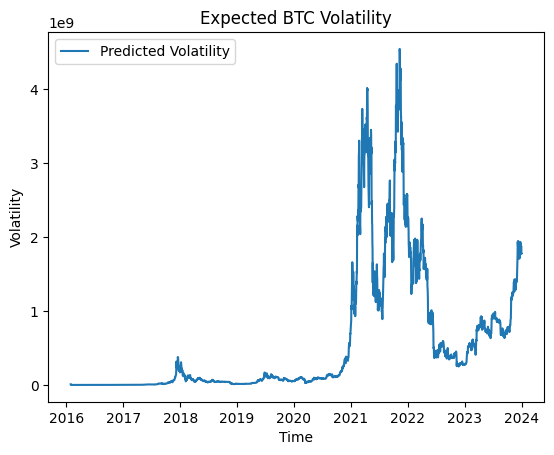

In [48]:
import matplotlib.pyplot as plt

index = range(len(predicted_volatility))

plt.plot(btc.index[500:], predicted_volatility, label='Predicted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Expected BTC Volatility')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.62e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 114180.97435087246
Iteration:      2,   Func. Count:     17,   Neg. LLF: 36303.69425588979
Iteration:      3,   Func. Count:     24,   Neg. LLF: 36303.25338899149
Iteration:      4,   Func. Count:     31,   Neg. LLF: 36301.47954418082
Iteration:      5,   Func. Count:     38,   Neg. LLF: 36299.616611144345
Iteration:      6,   Func. Count:     45,   Neg. LLF: 36299.548892712475
Iteration:      7,   Func. Count:     52,   Neg. LLF: 36299.512014787615
Iteration:      8,   Func. Count:     59,   Neg. LLF: 36299.28077201483
Iteration:      9,   Func. Count:     66,   Neg. LLF: 36298.03056566543
Iteration:     10,   Func. Count:     73,   Neg. LLF: 36291.516467461144
Iteration:     11,   Func. Count:     80,   Neg. LLF: 36256.89961759514
Iteration:     12,   Func. Count:     87,   Neg. LLF: 36040.83651354915
Iteration:     13,   Func. Count:     94,   Neg. LLF: 34934.12823929114
Iteration:     14,   Func. Count:    101,   Neg. LLF: 34924

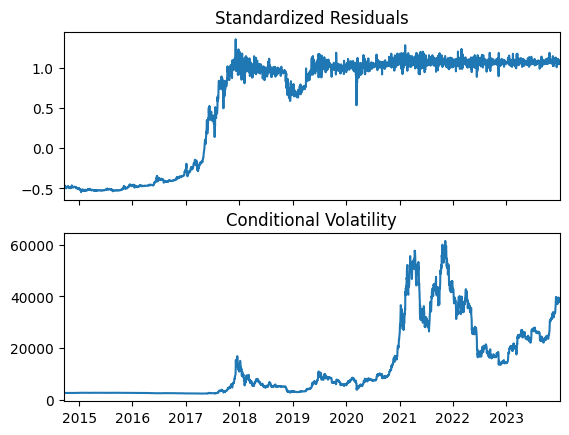

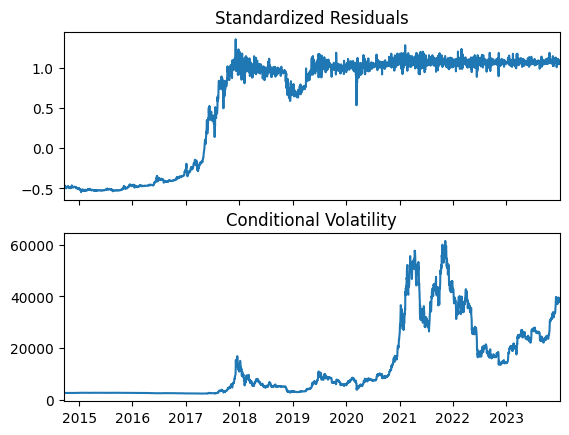

In [49]:
from arch import arch_model
model = arch_model(btc, vol='Garch', p=2, q=2)
results = model.fit()

# Print model summary
print(results.summary())

# Plot standardized residuals
results.plot()